In [12]:
from mat4py import loadmat
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import resize, downscale_local_mean
data = loadmat('emnist-digits-150.mat')
images = data["dataset"]["DigitImage"]["images"]
labels = data["dataset"]["DigitImage"]["labels"]
number_of_data = len(images)
# number_of_data
# np.array(images[1]).reshape(28,28).T
# labels

In [13]:
labled_data = {}
for i in range(10):
    labled_data[i] = []
for i in range(number_of_data):
    labled_data[labels[i][0]].append(np.array(images[i]).reshape(28,28).T)

# for j in range(len(labled_data[2])):
#     plt.imshow(labled_data[2][j])
#     plt.show()
        
best_index = {0:10, 1:12, 2:4, 3:5, 4:2, 5:8, 6:7, 7:4, 8:13, 9:1}


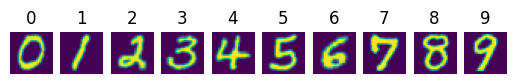

In [14]:
#plot all best index of images
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(labled_data[i][best_index[i]])
    plt.title(i)
    plt.axis("off")

In [15]:
labled_data_downscale = {}
for i in range(10):
    labled_data_downscale[i] = []
average_image = np.zeros((7,7))
for i in range(10):
    for j in range(len(labled_data[i])):
        new_image = downscale_local_mean(image=labled_data[i][j], factors=4)
        labled_data_downscale[i].append(new_image)
        average_image += new_image
average_image = average_image / 150
# average_image = average_image.mean()
average_image

array([[2.91666667e-03, 1.58333333e+00, 1.14408333e+01, 2.58412500e+01,
        2.77320833e+01, 1.37820833e+01, 9.64166667e-01],
       [4.22500000e-01, 2.21758333e+01, 8.89279167e+01, 1.11650833e+02,
        1.27089583e+02, 6.98833333e+01, 5.22625000e+00],
       [1.36916667e+00, 4.27495833e+01, 9.11454167e+01, 8.67770833e+01,
        1.04677500e+02, 4.62304167e+01, 2.77041667e+00],
       [2.80791667e+00, 4.94925000e+01, 9.28008333e+01, 1.14983333e+02,
        1.01044583e+02, 4.14075000e+01, 2.47708333e+00],
       [5.72958333e+00, 5.84337500e+01, 7.99616667e+01, 9.14808333e+01,
        8.98833333e+01, 5.58325000e+01, 2.42208333e+00],
       [5.05208333e+00, 6.86166667e+01, 1.19425833e+02, 1.17341667e+02,
        8.10908333e+01, 2.56737500e+01, 4.83333333e-01],
       [4.08333333e-01, 1.01979167e+01, 3.29175000e+01, 2.87133333e+01,
        9.16416667e+00, 1.64833333e+00, 4.50000000e-02]])

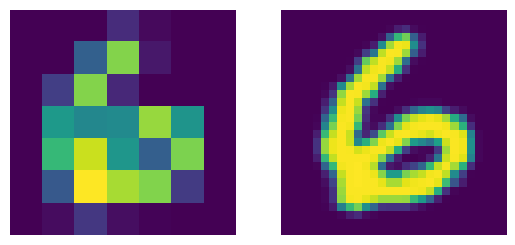

In [16]:
plt.subplot(1,2,1)
plt.imshow(labled_data_downscale[6][0])
plt.axis("off")
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(labled_data[6][0])
plt.show()

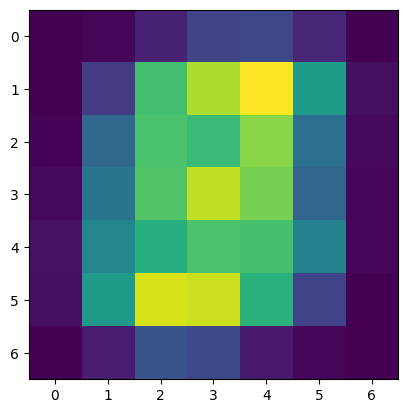

In [17]:
plt.imshow(average_image)
plt.show()

In [18]:
# cut all the photos from the average 
for i in range(10):
    for j in range(len(labled_data[i])):
        labled_data_downscale[i][j] = labled_data_downscale[i][j] - average_image


In [19]:
def gaussian_kernel(x1,x2):
    sigma = 200
    return np.exp(-np.sum((x1-x2)**2)/(2*sigma**2))
sample = labled_data_downscale[7][1]
for i in range(10):
    print(i, gaussian_kernel(labled_data_downscale[i][best_index[i]], sample))
# plt.imshow(labled_data_downscale[1][4])
# plt.show()
# plt.imshow(labled_data_downscale[4][best_index[4]])
# plt.show()
# plt.imshow(labled_data_downscale[3][best_index[3]])

0 0.035105244759400654
1 0.004612148517858229
2 0.023713186940009488
3 0.030073721884663243
4 0.014538037093949765
5 0.01145937429795096
6 0.01035638894693917
7 0.4082887378506988
8 0.026374963056438928
9 0.0777657444042614


In [20]:
def predict(similarities):
    consequesnces = []
    for i in range(10):
        i_similarity = similarities[:]
        for j in range(10):
            if j != i:
                i_similarity[j] = 1 - i_similarity[j]
        consequesnces.append(min(i_similarity))
    return consequesnces.index(max(consequesnces))
counter = 0

y_true = []
y_pred = []
for i in range(10):
    for j in range(len(labled_data_downscale[i])):
        similarities = []
        for k in range(10):
            similarity = gaussian_kernel(labled_data_downscale[k][best_index[k]], labled_data_downscale[i][j])
            similarities.append(similarity)
        result = predict(similarities)
        y_true.append(i)
        y_pred.append(result)
        print(i, ":", result)
    

0 : 0
0 : 0
0 : 6
0 : 8
0 : 0
0 : 0
0 : 0
0 : 8
0 : 8
0 : 8
0 : 0
0 : 3
0 : 0
0 : 0
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 3
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
2 : 4
2 : 2
2 : 0
2 : 1
2 : 2
2 : 9
2 : 2
2 : 3
2 : 8
3 : 9
3 : 3
3 : 5
3 : 3
3 : 9
3 : 3
3 : 9
3 : 3
3 : 3
3 : 3
3 : 3
3 : 3
3 : 3
3 : 3
3 : 9
3 : 3
3 : 3
3 : 3
3 : 5
4 : 9
4 : 9
4 : 4
4 : 9
4 : 4
4 : 9
4 : 8
4 : 1
4 : 4
4 : 9
4 : 8
4 : 1
5 : 4
5 : 3
5 : 7
5 : 9
5 : 1
5 : 7
5 : 8
5 : 3
5 : 5
5 : 6
5 : 1
5 : 5
5 : 3
5 : 5
5 : 5
5 : 5
5 : 8
5 : 5
5 : 0
5 : 5
6 : 6
6 : 6
6 : 6
6 : 0
6 : 4
6 : 6
6 : 0
6 : 6
6 : 6
6 : 6
6 : 6
6 : 4
6 : 1
6 : 6
6 : 3
6 : 6
6 : 6
6 : 6
7 : 9
7 : 7
7 : 9
7 : 1
7 : 7
7 : 9
7 : 9
7 : 9
7 : 1
7 : 9
7 : 7
7 : 3
7 : 3
8 : 9
8 : 9
8 : 1
8 : 3
8 : 1
8 : 9
8 : 8
8 : 1
8 : 1
8 : 9
8 : 8
8 : 8
8 : 9
8 : 8
9 : 1
9 : 9
9 : 9
9 : 9
9 : 9
9 : 9
9 : 9
9 : 5
9 : 9
9 : 7
9 : 9
9 : 1
9 : 9
9 : 8


In [23]:
from pretty_confusion_matrix import pp_matrix
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_pred=y_pred, y_true=y_true, )
print(np.diag(cfm).sum())
cfm


78


array([[12,  0,  0,  1,  0,  0,  1,  0,  4,  0],
       [ 0, 12,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  3,  1,  1,  0,  0,  0,  1,  1],
       [ 0,  0,  0, 13,  0,  2,  0,  0,  0,  4],
       [ 0,  2,  0,  0,  3,  0,  0,  0,  2,  5],
       [ 1,  2,  0,  3,  1,  7,  1,  2,  2,  1],
       [ 2,  1,  0,  1,  2,  0, 12,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  3,  0,  6],
       [ 0,  4,  0,  1,  0,  0,  0,  0,  4,  5],
       [ 0,  2,  0,  0,  0,  1,  0,  1,  1,  9]])

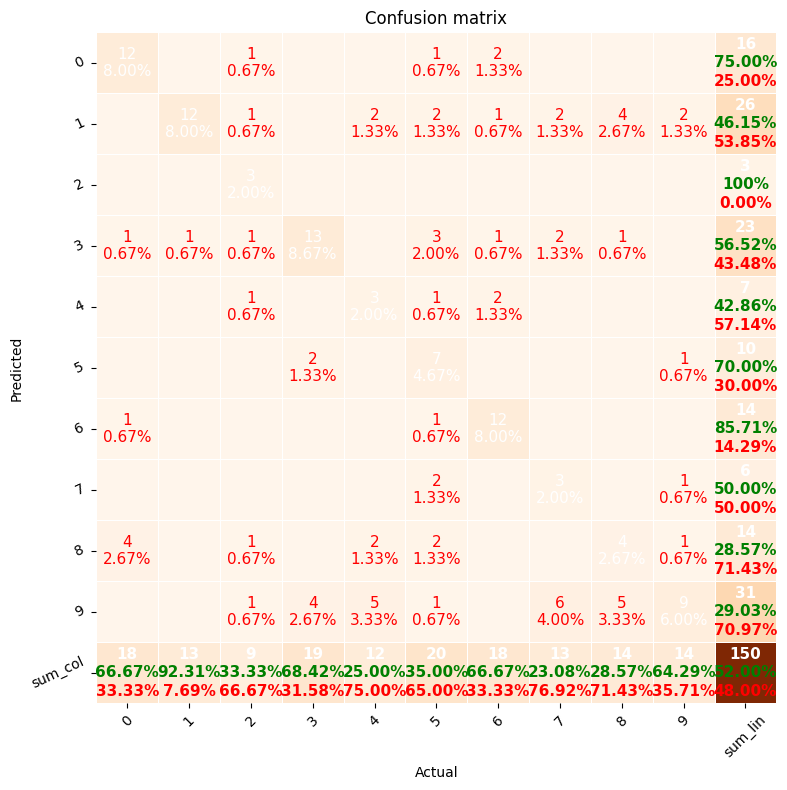

In [11]:
pp_matrix(pd.DataFrame(cfm))